# LifeWatch publication statistics - general

This jupyter notebook contains summary statistics relating to scientific publications published within the LifeWatch project.

In [1]:
# Load necessary libraries and functions
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# Specify location of data:
datafolder = "LW_publications_standardized" 
datafiles = ["LWpubs_stand_0_500.csv", 
             "LWpubs_stand_500_1000.csv", 
             "LWpubs_stand_1000_1500.csv", 
             "LWpubs_stand_1500_2000.csv", 
             "LWpubs_stand_2000_2500.csv",
             "LWpubs_stand_2500_3000.csv",
             "LWpubs_stand_3000_3500.csv",
             "LWpubs_stand_3500_4000.csv",
             "LWpubs_stand_4000_4500.csv",
             "LWpubs_stand_4500_5000.csv",
             "LWpubs_stand_5000_5500.csv",
             "LWpubs_stand_5500_6000.csv",
             "LWpubs_stand_6000_6227.csv"]

# Load data into single dataframe
appended_data = []
for datafile in datafiles:
    data_loc = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), datafolder, datafile)
    data = pd.read_csv(data_loc)
    data.rename(columns={'SortDate': 'Year'}, inplace=True)
    appended_data.append(data)
    
data = pd.concat(appended_data)

# Exclude publications from 2022:
data = data[data['Year']<2022]

# Set correct types
data['BrefID'] = data['BrefID'].astype("category")
data['Year'] = data['Year'].astype("category")
#data.info()

### 1. Number of publications:

In [3]:
#select necessary columns:
subset = data[['BrefID', 'Year']]
#summarize data:
pubs_summ = subset.groupby('Year', as_index=False).nunique('BrefID')

pubs_summ['BrefID_cuml'] = pubs_summ['BrefID'].cumsum()

In [4]:
table1 = pubs_summ.set_index('Year').T
table1

Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
BrefID,231,342,381,386,334,442,902,1046,1288,871
BrefID_cuml,231,573,954,1340,1674,2116,3018,4064,5352,6223


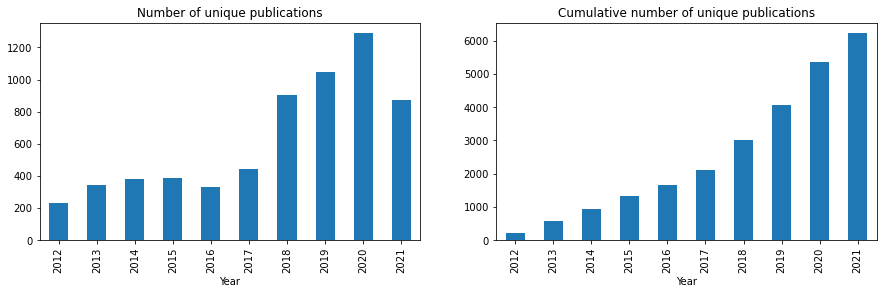

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4)) 
pubs_barplot = pubs_summ.plot(kind="bar", x='Year', y='BrefID', title="Number of unique publications", legend=False, ax=ax1)
cumm_pubs_barplot = pubs_summ.plot(kind="bar", x='Year', y='BrefID_cuml', title="Cumulative number of unique publications", legend=False, ax=ax2)

### 2. Number of Affiliations:

In [6]:
#select necessary columns:
subset = data[['BrefID', 'Year', 'Affiliation']]
# Number of affiliations per year
affil_summ = subset.groupby('Year', as_index=False).nunique('Affiliation')
# Cummulative number of affiliations 
affil_summ['Affiliation_cuml'] = affil_summ['Affiliation'].cumsum()

# Average number of publications per affiliation, per year
affil_summ['Pubs/Affil'] = affil_summ['BrefID']/affil_summ['Affiliation']

In [7]:
table2 = affil_summ.round(2).set_index('Year').T
#table2 #includes average number of publication per affiliation
table2[0:3]

Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
BrefID,231.0,342.0,381.0,386.0,334.0,442.0,902.0,1046.0,1288.0,871.0
Affiliation,84.0,127.0,137.0,124.0,95.0,100.0,67.0,120.0,82.0,34.0
Affiliation_cuml,84.0,211.0,348.0,472.0,567.0,667.0,734.0,854.0,936.0,970.0


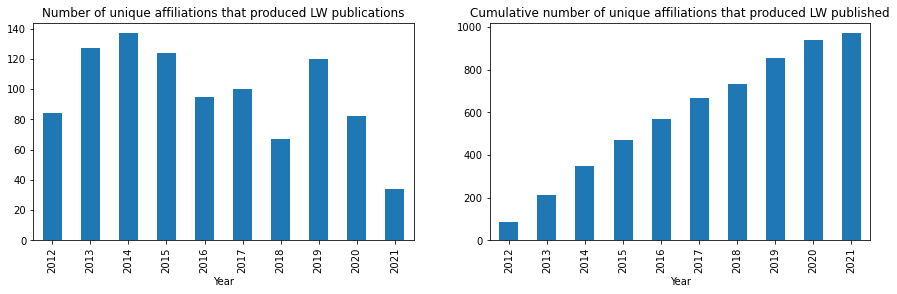

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4)) 
#bar-plot of affiliations (from scientific publications published in the respective year):
uniqaffil_barplot = affil_summ.plot(kind="bar", x='Year', y='Affiliation', title="Number of unique affiliations that produced LW publications", legend=False, ax=ax1)
cumm_affil_barplot = affil_summ.plot(kind="bar", x='Year', y='Affiliation_cuml', title="Cumulative number of unique affiliations that produced LW published", legend=False, ax=ax2)

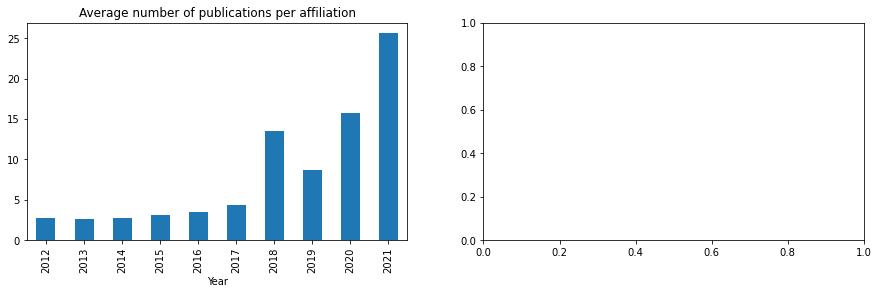

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4)) 
fig6 = affil_summ.plot(kind="bar", x='Year', y='Pubs/Affil', title="Average number of publications per affiliation", legend=False, ax=ax1)

#### 2.B. Number of new affiliations:

In [10]:
# pivot table of publishing affiliation in publication years:
affils = data[['Year', 'Affiliation']].drop_duplicates(['Year', 'Affiliation'])
affils['values'] = "x"
affils_pivot = affils.pivot(index="Affiliation", columns="Year", values="values")

#built dataframe with the number of new affiliations each year:
new_affils = pd.DataFrame()
new_affils.at['new_affiliations', 2012] = affils_pivot[2012].count()
new_affils.at['new_affiliations', 2013] = affils_pivot.loc[affils_pivot[2012].isna(), 2013].count()
new_affils.at['new_affiliations', 2014] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna()), 2014].count()
new_affils.at['new_affiliations', 2015] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna())&(affils_pivot[2014].isna()), 2015].count()
new_affils.at['new_affiliations', 2016] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna())&(affils_pivot[2014].isna())&(affils_pivot[2015].isna()), 2016].count()
new_affils.at['new_affiliations', 2017] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna())&(affils_pivot[2014].isna())&(affils_pivot[2015].isna())&(affils_pivot[2016].isna()), 2017].count()
new_affils.at['new_affiliations', 2018] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna())&(affils_pivot[2014].isna())&(affils_pivot[2015].isna())&(affils_pivot[2016].isna())&(affils_pivot[2017].isna()), 2018].count()
new_affils.at['new_affiliations', 2019] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna())&(affils_pivot[2014].isna())&(affils_pivot[2015].isna())&(affils_pivot[2016].isna())&(affils_pivot[2017].isna())&(affils_pivot[2018].isna()), 2019].count()
new_affils.at['new_affiliations', 2020] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna())&(affils_pivot[2014].isna())&(affils_pivot[2015].isna())&(affils_pivot[2016].isna())&(affils_pivot[2017].isna())&(affils_pivot[2018].isna())&(affils_pivot[2019].isna()), 2020].count()
new_affils.at['new_affiliations', 2021] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna())&(affils_pivot[2014].isna())&(affils_pivot[2015].isna())&(affils_pivot[2016].isna())&(affils_pivot[2017].isna())&(affils_pivot[2018].isna())&(affils_pivot[2019].isna())&(affils_pivot[2020].isna()), 2020].count()

new_affils = new_affils.T.reset_index().rename(columns={'index': 'Year'})
new_affils['new_affiliations_cum'] = new_affils['new_affiliations'].cumsum()

In [11]:
table3 = new_affils.set_index('Year').T
table3

Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
new_affiliations,85.0,124.0,122.0,109.0,85.0,83.0,53.0,96.0,57.0,0.0
new_affiliations_cum,85.0,209.0,331.0,440.0,525.0,608.0,661.0,757.0,814.0,814.0


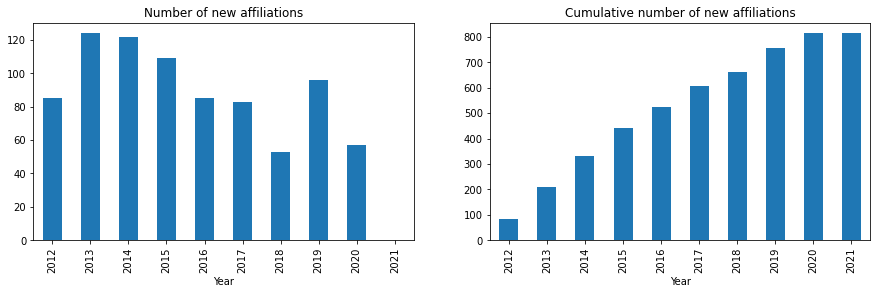

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4)) 
# bar-plot of new affiliations each publication year: 
fig4 = new_affils.plot(kind="bar", x='Year', y='new_affiliations', title="Number of new affiliations", legend=False, ax=ax1)

# cumulative bar-plot of new affiliations each publication year:
fig5 = new_affils.plot(kind="bar", x='Year', y='new_affiliations_cum', title="Cumulative number of new affiliations", legend=False, ax=ax2)

### 2. Number of Affiliations per Categorie and Quadruple Helix term:

In [13]:
# Select & Rename necessary columns:
data = data.rename(columns={'BrefID': 'Publications', 'stand_affil': 'Standardized_Affiliation'})
data_cat = data[['Standardized_Affiliation','Publications','stand_GROUP','stand_QH']]
# Summarize:
data_cat_summ = data_cat.groupby(['stand_QH','stand_GROUP'], dropna=True, as_index=True).nunique('Standardized_Affiliation').sort_values('Standardized_Affiliation', ascending=False)
data_cat_summ

Standardized_Affiliation  Publications
stand_QH      stand_GROUP                                                     
Science       University                                     734          1602
              Research institute                             367          1006
              Museum                                          66           166
Policy        Governmental body                               23            65
Science       Research network                                21            50
Industry      Company                                         15            15
              Consultancy                                     10            14
Civil society Non-profit organization                          9            14
Science       Research Institute                               5             9
Policy        Other public authorities                         4             8
Science       Data infrastructure                              4             5
              International programme                          3             9
Civil society Creative body                                    2             2
              NGO                                              2             2
Policy        EU institution                                   2             2
              Intergovernmental body                           1             1
Science       Scientific journal                               1             5
Policy        UN organization                                  1             2

In [14]:
data_cat_summ.to_csv('Affiliation_pub_summary.csv', encoding='utf-8')

### 3. Number of Global, Belgian and Flemish affiliations: 
With the corresponding number of published scientific publications

#### Number of Affiliations worldwide:

In [15]:
# Select & Rename necessary columns:
data = data.rename(columns={'BrefID': 'Publications', 'stand_affil': 'Standardized_Affiliation'})
data_country = data[['Publications', 'Standardized_Affiliation', 'stand_country', 'stand_flemish']]
data_country = data_country[data_country['stand_country'].notna()]

In [16]:
data_country_summ = data_country.groupby(['stand_country'], dropna=False, as_index=True).nunique('Standardized_Affiliation').sort_values('Standardized_Affiliation', ascending=False)
data_country_summ

,Publications,Standardized_Affiliation,stand_flemish
stand_country,,,
USA,316,158,0
UK,137,75,0
France,112,61,0
Spain,146,61,0
Italy,174,56,0
...,...,...,...
Malta,2,1,0
Montenegro,1,1,0
New Caledonia,1,1,0


In [17]:
data_country_summ.to_csv('Affiliation_pub_country_summary.csv', encoding='utf-8')

Text(0, 0.5, 'Country')

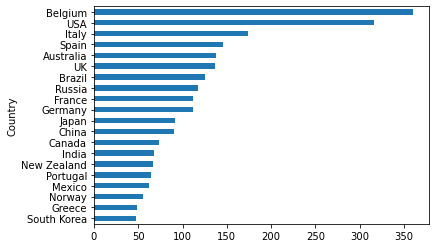

In [18]:
data_country_summ['Publications'].nlargest(20).sort_values(ascending=True).plot.barh()
plt.ylabel('Country')

#### Number of Belgian affiliations:

In [19]:
data_bel = data[ data['stand_country'] == 'Belgium']
data_bel = data_bel[['Publications', 'Standardized_Affiliation', 'stand_flemish', 'stand_GROUP', 'stand_QH']]
data_bel

,Publications,Standardized_Affiliation,stand_flemish,stand_GROUP,stand_QH
0,213282,VLIZ Flanders Marine Institute,x,Research institute,Science
1,213296,VLIZ Flanders Marine Institute,x,Research institute,Science
2,213337,VLIZ Flanders Marine Institute,x,Research institute,Science
3,213372,VLIZ Flanders Marine Institute,x,Research institute,Science
4,215501,VLIZ Flanders Marine Institute,x,Research institute,Science
...,...,...,...,...,...
65,345458,University of Liège,o,University,Science
119,345770,Hasselt University - Centre for Environmental ...,x,Research institute,Science
144,347129,Hasselt University - Centre for Environmental ...,x,Research institute,Science
187,347414,University of Liège,o,University,Science


In [20]:
data_bel.to_csv('Affiliation_pub_BE.csv', encoding='utf-8')

In [21]:
data_bel_count = data_bel.count()
data_bel_count

Publications                360
Standardized_Affiliation    360
stand_flemish               354
stand_GROUP                 360
stand_QH                    360
dtype: int64

In [22]:
data_bel_summ = data_bel.groupby(['stand_QH', 'stand_GROUP'], dropna=False, as_index=True).nunique('Standardized_Affiliation').sort_values('Standardized_Affiliation', ascending=False)
data_bel_summ

Publications  Standardized_Affiliation  \
stand_QH      stand_GROUP                                                       
Science       Research institute                292                        25   
              University                         46                        22   
              Museum                             14                         4   
Civil society Creative body                       1                         1   
Policy        Governmental body                   1                         1   
Science       International programme             6                         1   

                                       stand_flemish  
stand_QH      stand_GROUP                             
Science       Research institute                   2  
              University                           2  
              Museum                               2  
Civil society Creative body                        1  
Policy        Governmental body                    1  
Science       International programme              1

In [23]:
data_bel_summ.to_csv('Affiliation_pub_BE_summary.csv', encoding='utf-8')

#### Number of Flemish affiliations:

In [24]:
data_flem = data[ data['stand_flemish'] == 'x']
data_flem = data_flem[['Publications', 'Standardized_Affiliation', 'stand_flemish', 'stand_GROUP', 'stand_QH']]
data_flem

,Publications,Standardized_Affiliation,stand_flemish,stand_GROUP,stand_QH
0,213282,VLIZ Flanders Marine Institute,x,Research institute,Science
1,213296,VLIZ Flanders Marine Institute,x,Research institute,Science
2,213337,VLIZ Flanders Marine Institute,x,Research institute,Science
3,213372,VLIZ Flanders Marine Institute,x,Research institute,Science
4,215501,VLIZ Flanders Marine Institute,x,Research institute,Science
...,...,...,...,...,...
147,344769,University of Antwerp - Faculty of Science - D...,x,University,Science
252,344944,VLIZ Flanders Marine Institute,x,Research institute,Science
497,345269,Ghent University - Faculty of Bioscience Engin...,x,Research institute,Science
119,345770,Hasselt University - Centre for Environmental ...,x,Research institute,Science


In [25]:
data_flem.to_csv('Affiliation_pub_FL.csv', encoding='utf-8')

In [26]:
data_flem_count = data_flem.count()
data_flem_count

Publications                306
Standardized_Affiliation    306
stand_flemish               306
stand_GROUP                 306
stand_QH                    306
dtype: int64

In [27]:
data_flem_summ = data_flem.groupby(['stand_QH', 'stand_GROUP'], dropna=False, as_index=True).nunique('Standardized_Affiliation').sort_values('Standardized_Affiliation', ascending=False)
data_flem_summ

Publications  Standardized_Affiliation  \
stand_QH      stand_GROUP                                                  
Science       Research institute           271                        17   
              University                    27                        15   
              Museum                         6                         3   
Civil society Creative body                  1                         1   
Policy        Governmental body              1                         1   

                                  stand_flemish  
stand_QH      stand_GROUP                        
Science       Research institute              1  
              University                      1  
              Museum                          1  
Civil society Creative body                   1  
Policy        Governmental body               1

In [28]:
data_flem_summ.to_csv('Affiliation_pub_FL_summary.csv', encoding='utf-8')